###Importing required python libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt 

###Reading the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/UNT_Empirical/project/healthcare-dataset-stroke-data.csv')

###Displaying the columns

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


###Datatypes of the columns

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

###Total rows x columns

In [6]:
df.shape

(5110, 12)

###Data cleaning & Data Cleaning:

Counting each column length

In [7]:
df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

Dropping the duplicates if existing in the datset which leads to error

In [8]:
df = df.drop_duplicates()

Count of each column after removal of duplicate data

In [9]:
df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

Finding the null values in the dataset

In [10]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Filling the null values with the 0 value 

In [11]:
df.fillna(0,inplace=True)

Null values after data handling

In [12]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Finding the outliers for specified columns which will effect in errors

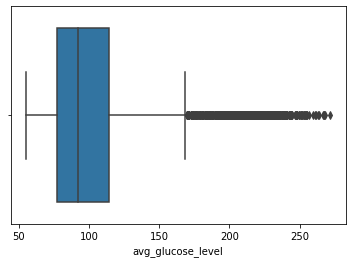

In [13]:
sns.boxplot(x=df['avg_glucose_level'])

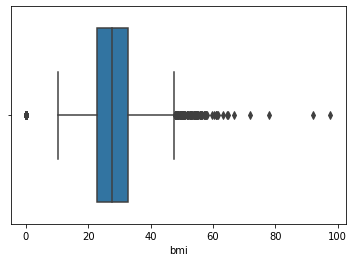

In [14]:
sns.boxplot(x=df['bmi'])

Finding the quartile values

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                   36940.750
age                     36.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       36.845
bmi                      9.900
stroke                   0.000
dtype: float64


Removing the unnecessary data which is outside the quartiles

In [16]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(3759, 12)

Describe the dataset

In [ ]:
df.describe

In [18]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
255,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0


In [36]:
from sklearn.preprocessing import LabelEncoder 
import pandas as pd
lbEn = LabelEncoder()

lbEn.fit(df.gender.drop_duplicates())
df.gender = lbEn.transform(df.gender)
lbEn.fit(df.work_type.drop_duplicates())
df.work_type = lbEn.transform(df.work_type)
lbEn.fit(df.smoking_status.drop_duplicates())
df.smoking_status = lbEn.transform(df.smoking_status)
lbEn.fit(df.ever_married.drop_duplicates())
df.ever_married = lbEn.transform(df.ever_married)

In [38]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,0,3.0,0,0,0,4,0,95.12,18.0,0,0
251,16523,1,8.0,0,0,0,0,1,110.89,17.6,0,0
252,56543,1,70.0,0,0,1,0,0,69.04,35.9,1,0
253,46136,0,14.0,0,0,0,3,0,161.28,19.1,0,0
255,52800,1,52.0,0,0,1,0,1,77.59,17.7,1,0


In [20]:
stroke_yes = df.loc[df['stroke'] == 1]
stroke_no = df.loc[df['stroke'] == 0]
final_stroke = pd.concat([stroke_yes, stroke_no])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


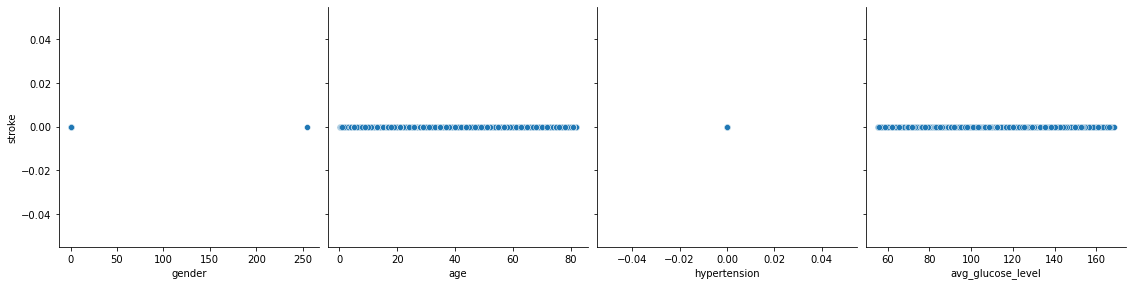

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.pairplot(df, x_vars = ['gender', 'age','hypertension','avg_glucose_level'], y_vars = 'stroke', size=4, aspect=1, kind='scatter')
plt.show()

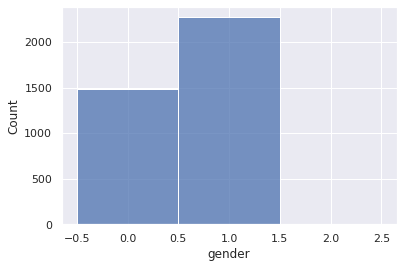

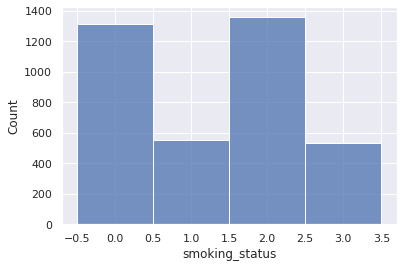

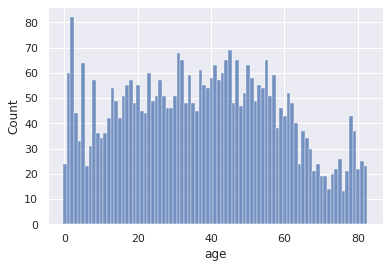

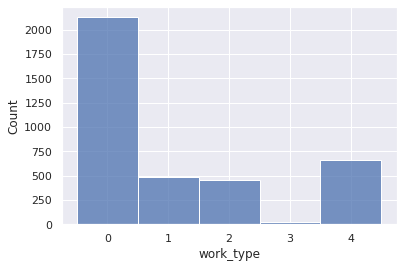

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
sns.histplot(data=df, x="gender", discrete=True)
plt.show()

sns.set(style='darkgrid')
sns.histplot(data=df, x="smoking_status", discrete=True)
plt.show()

sns.set(style='darkgrid')
sns.histplot(data=df, x="age", discrete=True)
plt.show()

sns.set(style='darkgrid')
sns.histplot(data=df, x="work_type", discrete=True)
plt.show()

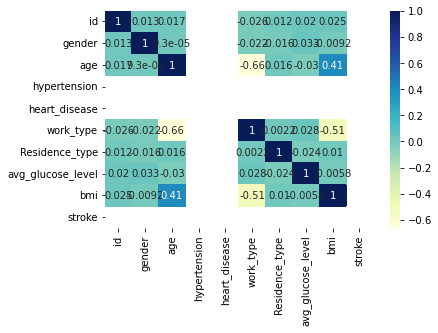

In [23]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [24]:
X = df[['avg_glucose_level']]
y = df['stroke']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
X_train
y_train

1996    0
3004    0
1259    0
4776    0
3973    0
       ..
2789    0
363     0
2702    0
3967    0
2272    0
Name: stroke, Length: 2631, dtype: int64

In [56]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Grade   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     9933.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        06:05:09   Log-Likelihood:                -1912.9
No. Observations:                 700   AIC:                             3830.
Df Residuals:                     698   BIC:                             3839.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6410      0.635      8.881      0.000       4.394       6.888
writing score     0.9115      0.009     99.665      0.000       0.894       0.929
==============================================================================
Omnibus:                        3.134   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                2.570
Skew:                           0.008   Prob(JB):                        0.277
Kurtosis:                       2.704   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""